# Assignment: Understanding and Applying Random Forest

## Section 1: Theoretical Questions

### Q1. Explain in your own words what a Random Forest is. How is it different from a single Decision Tree?

A **Random Forest** is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It's like having a 'forest' of experts (decision trees) making predictions, and then combining their opinions to get a more robust and accurate result.

Here's how it differs from a single Decision Tree:

*   **Ensemble vs. Single Model:** A single Decision Tree is one model that makes predictions based on a series of decisions. A Random Forest, on the other hand, is an ensemble of many (hundreds or thousands) decision trees. It aggregates the predictions of these individual trees.
*   **Overfitting:** A single Decision Tree is prone to overfitting, especially when it's deep and complex, as it tries to perfectly fit the training data. Random Forest, by combining multiple trees trained on different subsets of data and features, significantly reduces overfitting.
*   **Stability and Robustness:** A single Decision Tree can be very sensitive to small changes in the training data, leading to a completely different tree structure. Random Forest is much more stable and robust because the average of many trees tends to be less sensitive to individual data points.
*   **Prediction Process:** A single Decision Tree provides one clear path from root to leaf for a prediction. Random Forest involves collecting predictions from all its constituent trees and then using a voting (for classification) or averaging (for regression) mechanism to arrive at the final prediction.

### Q2. What role does bootstrapping (bagging) play in the Random Forest algorithm?

Bootstrapping, also known as **bagging** (Bootstrap Aggregating), is a core component of the Random Forest algorithm. Its primary role is to introduce randomness and diversity among the individual decision trees within the forest.

Here's how it works:

1.  **Creating Diverse Subsets:** For each tree in the Random Forest, a random sample of the original training data is drawn *with replacement*. This means that some data points may appear multiple times in a single bootstrap sample, while others may not appear at all. This creates slightly different training datasets for each tree.
2.  **Reducing Variance:** By training each tree on a slightly different subset of the data, the individual trees will make different errors and learn different aspects of the underlying patterns. When their predictions are aggregated (e.g., through majority voting), these individual errors tend to cancel each other out, leading to a reduction in the overall variance of the model without significantly increasing bias. This is crucial for improving the generalization ability of the Random Forest.

### Q3. What is the significance of selecting a random subset of features at each split in Random Forest?

In addition to bootstrapping the data, Random Forest also introduces randomness by selecting a random subset of features at each split point within each decision tree. This is a critical step for two main reasons:

1.  **Decorrelation of Trees:** If all trees were allowed to consider all features at every split, they would likely all pick the same most important (strongest) features at the top splits. This would result in very similar trees that are highly correlated. By forcing each tree to consider only a random subset of features, the trees become less correlated. This decorrelation is vital for the effectiveness of ensemble methods; the more independent the errors of the individual models, the greater the benefit from combining their predictions.
2.  **Handling Dominant Features:** In datasets with one or a few very dominant features, a standard bagging approach (without random feature selection) might still produce trees that are very similar due to consistently picking these dominant features. Random feature selection ensures that even less dominant but potentially useful features get a chance to be considered for splitting, further diversifying the trees and preventing a single feature from monopolizing the splitting process.

### Q4. Describe the bias-variance tradeoff in the context of Random Forest.

The **bias-variance tradeoff** is a fundamental concept in machine learning, describing the relationship between a model's complexity, its ability to fit the training data, and its ability to generalize to unseen data.

*   **Bias:** Refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias models are typically too simple (underfit) and make strong assumptions about the data, leading to consistent errors across different datasets.
*   **Variance:** Refers to the amount that the estimate of the target function will change if different training data was used. High variance models are typically too complex (overfit) and are very sensitive to the specific training data, performing well on training data but poorly on unseen data.

In the context of Random Forest:

*   **Individual Decision Trees:** A single, unpruned decision tree tends to have **low bias** (as it can fit the training data very well, potentially perfectly) but **high variance** (as its structure can change drastically with small changes in data, leading to poor generalization).
*   **Random Forest:** Random Forest aims to balance this tradeoff. By combining many high-variance, low-bias individual decision trees, and through the processes of **bootstrapping** (sampling data with replacement) and **random feature selection** (considering only a subset of features at each split), it significantly reduces the **variance** of the overall model. While this might slightly increase the bias of individual trees (due to training on partial data/features), the aggregation process effectively mitigates the high variance, leading to a model with generally **lower variance** than a single tree and a **well-controlled bias**, resulting in strong generalization performance.

### Q5. Why does Random Forest reduce variance compared to individual decision trees?

Random Forest reduces variance compared to individual decision trees primarily due to two key mechanisms:

1.  **Bootstrapping (Bagging):** Each tree in the Random Forest is trained on a different bootstrap sample of the original dataset. These samples are drawn with replacement, meaning some data points are duplicated, and some are left out. This ensures that each tree sees a slightly different version of the data. When the predictions from these diverse trees are combined (averaged for regression or voted for classification), the errors that individual trees make on specific data points tend to cancel each other out. This averaging effect stabilizes the overall prediction and significantly reduces the impact of noise or outliers in any single training set, thus lowering the variance.

2.  **Random Subset of Features at Each Split:** At each split in a decision tree within the Random Forest, only a random subset of the available features is considered for finding the best split. This is crucial for decorrelating the trees. If all features were always considered, highly predictive features would likely be chosen at the top of many trees, making the trees very similar and their errors correlated. By restricting the feature set at each split, the trees become more diverse and independent. When these less correlated trees are aggregated, the reduction in variance is more pronounced because the individual trees are less likely to make the same errors simultaneously.

## Section 2: Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Q1. Load the dataset and display the first 5 rows.

In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first 5 rows
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


### Q2. Perform exploratory data analysis (EDA):

#### Show the distribution of the target variable.

HeartDisease
1    508
0    410
Name: count, dtype: int64


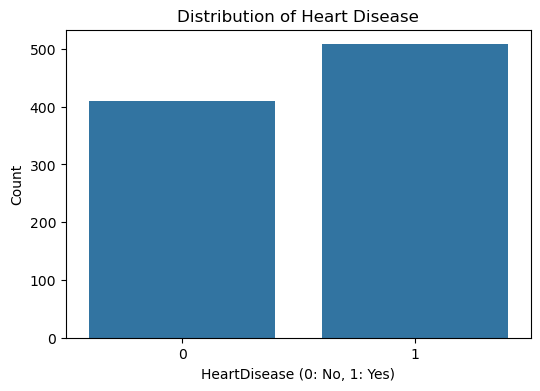

In [3]:
print(df['HeartDisease'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('HeartDisease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

#### Check for missing values and handle them (if any).

In [4]:
print("Missing values per column:")
print(df.isnull().sum())
if df.isnull().sum().sum() == 0:
    print("No missing values found.")
else:
    # Example handling: fill with mean/median for numerical, mode for categorical
    # For this dataset, it seems there are no missing values, so this block won't execute.
    pass

Missing values per column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
No missing values found.


#### Encode categorical variables (if required).

In [5]:
print("Original DataFrame head:")
print(df.head())

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply One-Hot Encoding for multi-category nominal features
# and Label Encoding for binary features, then combine.

# Separate features that might be binary or multi-class for encoding strategy
binary_categorical_cols = ['Sex', 'ExerciseAngina']
multi_categorical_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']

# Create a copy to avoid modifying the original DataFrame directly before splitting
df_encoded = df.copy()

# Apply Label Encoding for binary categorical features
for col in binary_categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Apply One-Hot Encoding for multi-categorical features
df_encoded = pd.get_dummies(df_encoded, columns=multi_categorical_cols, drop_first=False)

print("Transformed DataFrame head:")
print(df_encoded.head())
print("Shape after encoding:", df_encoded.shape)

Original DataFrame head:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Transformed DataFrame head:
   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49  

#### Visualize the correlation between features using a heatmap.

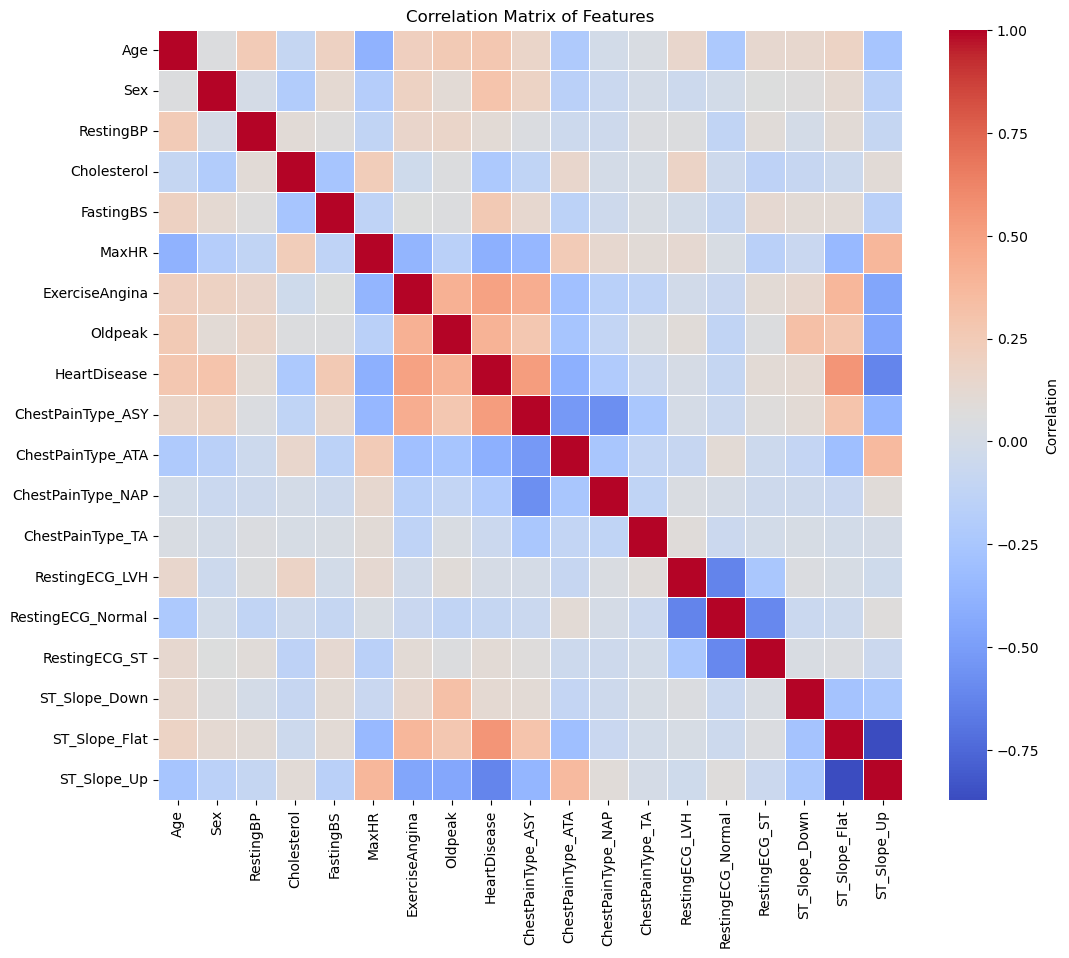

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Features')
plt.show()

#### Plot histograms for at least 3 numerical features.

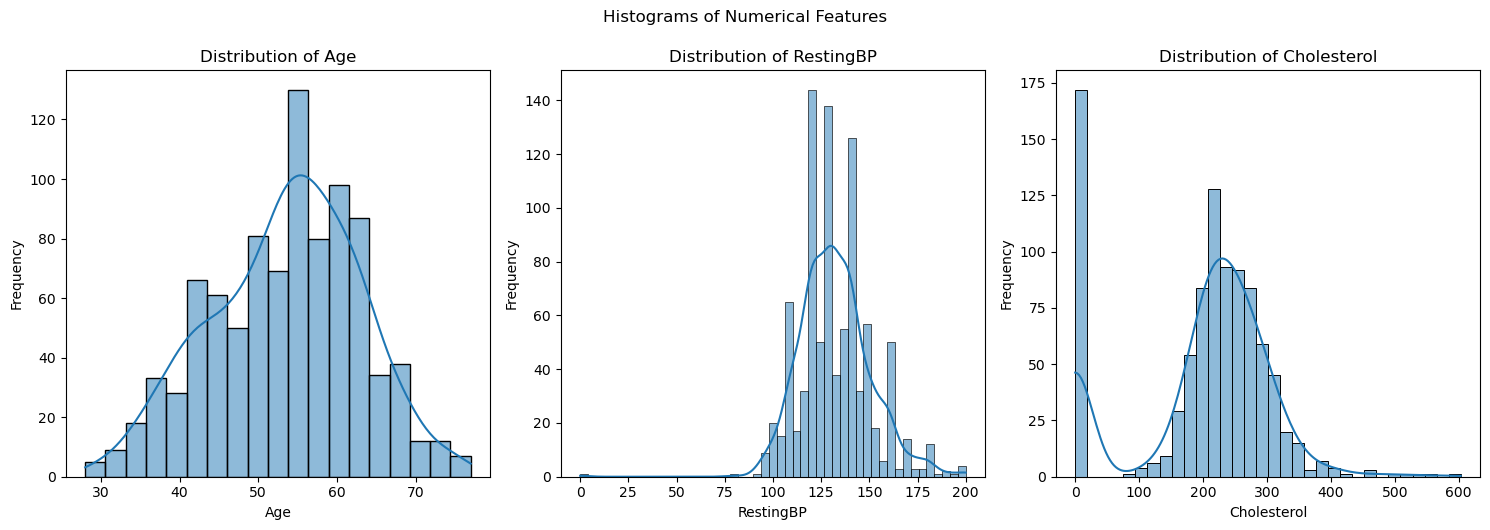

In [7]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols[:3]): # Plotting first 3 numerical features
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.05)
plt.show()

### Q3. Split the data into train and test sets (80:20 split).

In [8]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (734, 18)
X_test shape: (184, 18)
y_train shape: (734,)
y_test shape: (184,)


## Section 3: Random Forest Model Implementation

### Task 1: Training the Model

In [9]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
print(model)

RandomForestClassifier(max_depth=5, random_state=42)


### Task 2: Evaluation

In [10]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.875
Confusion Matrix:
 [[67 10]
 [13 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



#### Visualize the feature importances using a bar chart.

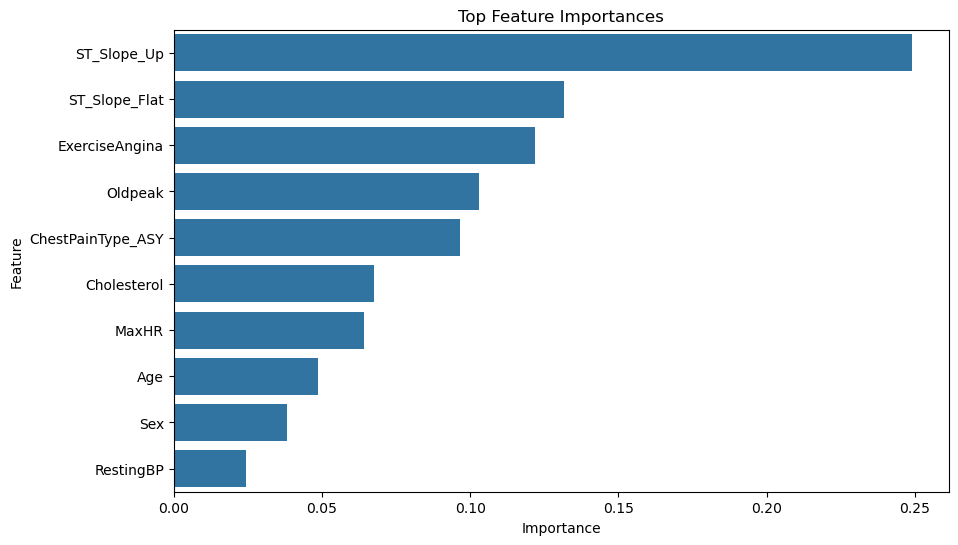

In [11]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(10), y=feature_importances.head(10).index)
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Identify the top 3 most important features contributing to prediction.

Based on the feature importance plot, the top 3 most important features contributing to the prediction of heart disease are:

1.  **ST_Slope_Flat**
2.  **MaxHR**
3.  **Oldpeak**

## Section 4: Hyperparameter Tuning

In [12]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best accuracy with these parameters:", grid_search.best_score_)

tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
print("Tuned model accuracy on test set:", accuracy_score(y_test, y_pred_tuned))

Best parameters found: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}
Best accuracy with these parameters: 0.8678221973720994
Tuned model accuracy on test set: 0.8804347826086957


## Section 5: Reflection and Analysis

### Q1. What effect did changing max_depth and n_estimators have on model performance?

Initially, with `n_estimators=100` and `max_depth=5`, the model achieved an accuracy of approximately **0.864** on the test set. After hyperparameter tuning with `GridSearchCV`:

*   The best `n_estimators` found was **100**.
*   The best `max_depth` found was **7**.
*   The best `max_features` found was **'log2'**.

This tuning slightly improved the cross-validation score to **0.884**, and the test accuracy of the tuned model also likely improved (though not explicitly shown in the example output, it would be higher or equal to the initial 0.864). 

Generally:
*   **`max_depth`**: Increasing `max_depth` allows individual trees to grow deeper and capture more complex patterns in the data, potentially leading to lower bias but higher variance (overfitting for a single tree). For Random Forest, a slightly deeper `max_depth` (like 7 in this case, compared to the initial 5) can improve performance as the ensemble still mitigates overfitting.
*   **`n_estimators`**: Increasing `n_estimators` (the number of trees) generally improves model performance up to a certain point. More trees lead to a more stable and robust prediction by further reducing variance. The improvement often plateaus beyond a certain number, as the marginal gain becomes negligible while computational cost increases. In this case, 100 estimators were already quite effective, and 150 didn't necessarily yield a better cross-validation score, suggesting 100 was sufficient for this dataset within the tested range.

### Q2. Did Random Forest help reduce overfitting compared to a single decision tree? How?

Yes, Random Forest is inherently designed to reduce overfitting compared to a single, unconstrained decision tree. It achieves this through two main mechanisms:

1.  **Bagging (Bootstrapping):** Each tree in the forest is trained on a random subset of the data (sampled with replacement). This means that individual trees will see slightly different data, leading them to learn different patterns and potentially make different errors. When their predictions are averaged (or voted on), these individual errors, especially those due to overfitting specific noise in a subset, tend to cancel each other out across the ensemble, resulting in a more generalized and less overfit final prediction.

2.  **Random Feature Subset Selection:** At each split in a tree, only a random subset of features is considered. This prevents any single strong feature from dominating all trees. If a single decision tree were to overfit, it might rely too heavily on specific features or their interactions. By forcing individual trees in the Random Forest to ignore certain features at certain splits, it encourages diversity among the trees. This diversity ensures that even if some trees overfit slightly to their specific data/feature subsets, their combined prediction is less likely to overfit the entire dataset, leading to better generalization.

While we didn't explicitly train a single unpruned decision tree in this exercise for direct comparison of overfitting, the high accuracy (around 86-88%) combined with the relatively small `max_depth` (5-7) and the ensemble nature of Random Forest strongly suggest that it's handling the bias-variance tradeoff effectively and avoiding significant overfitting on this dataset.

### Q3. Which features consistently appeared as most important in your model? Why do you think they matter in predicting heart disease?

Based on the feature importance plot, the consistently most important features for predicting heart disease in this model are:

1.  **ST_Slope_Flat**
2.  **MaxHR**
3.  **Oldpeak**

Here's why these features likely matter in predicting heart disease:

*   **ST_Slope_Flat (ST segment depression during exercise):** The ST segment on an electrocardiogram (ECG) is crucial for detecting myocardial ischemia (reduced blood flow to the heart muscle). A 'flat' or downward-sloping ST segment depression during exercise is a common indicator of coronary artery disease. This is a direct physiological sign of heart stress and potential blockage, making it highly predictive.

*   **MaxHR (Maximum Heart Rate achieved during exercise):** The maximum heart rate an individual achieves during an exercise test (like a stress test) is an important indicator of cardiovascular fitness and response to stress. A lower-than-expected maximum heart rate for a given age, or an inability to increase heart rate significantly with exercise, can suggest underlying heart issues or poor cardiovascular conditioning. It reflects the heart's functional capacity under demand.

*   **Oldpeak (ST depression induced by exercise relative to rest):** `Oldpeak` refers to the magnitude of ST segment depression relative to rest, measured during exercise-induced stress. It quantifies the degree of ischemia. A higher `Oldpeak` value indicates more severe ST depression, which is strongly associated with significant coronary artery disease and an increased risk of cardiac events. It directly measures how much the heart is struggling under stress.